# Introdução

## Modelo de classificação

Irei construir um algoritmo que faça a __predição se um dígito é par ou ímpar,__ através de um modelo supervisionado de machine learning.

O dataset utilizado vem a partir da biblioteca mnist, onde possui imagens de números para fazer o treinamento do modelo.

Para isso, farei um tratamento inicial na variável target e irei usar a AUC como métrica de Performance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist["data"], mnist["target"].astype(float)
X.shape, y.shape


((70000, 784), (70000,))

In [4]:
X.dtype, y.dtype 

(dtype('float64'), dtype('float64'))

In [5]:
y[:10]

array([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.])

In [6]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [7]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [8]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

In [9]:
ytrain = np.where(ytrain % 2 != 0 , 0, 1)
ytest = np.where(ytest % 2 != 0 , 0, 1)

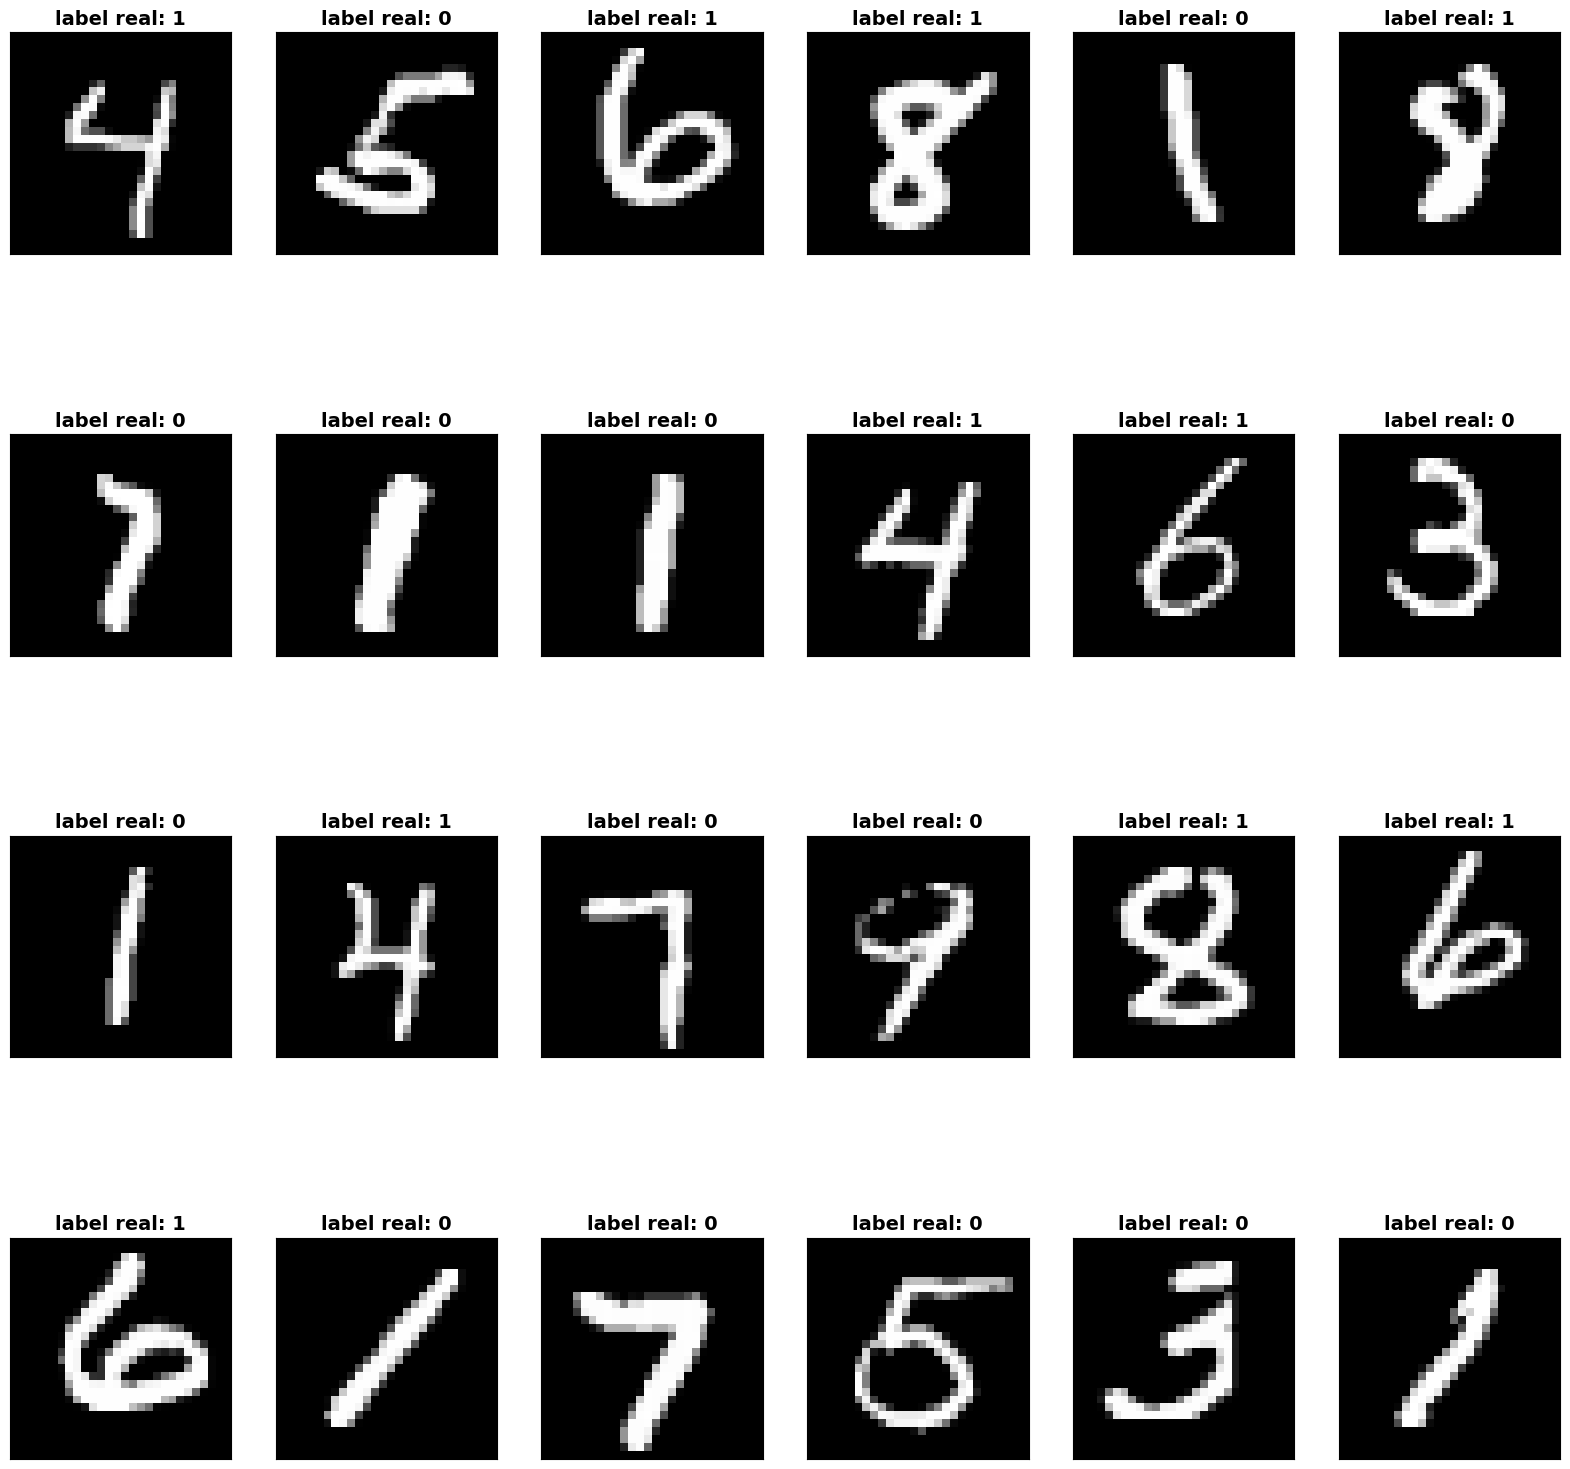

In [10]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

In [11]:
print('Percentual pares: ',(ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual ímpares: ',((ytrain.size-ytrain.sum()) / ytrain.size) * 100, '%')

Percentual pares:  49.154545454545456 %
Percentual ímpares:  50.84545454545455 %


In [12]:
import time
from sklearn.linear_model import LogisticRegression

In [13]:
t0 = time.time()

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

tempo (em segundos) para execução:  5.81


In [14]:
print(logreg.intercept_)
print(logreg.coef_)

[-0.00096029]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.37046035e-05  3.27105660e-05  3.00704272e-06  1.25293447e-07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.20835566e-07  9.93024009e-07  2.57963409e-05  4.77977202e-05
   7.04037874e-05  4.93755705e-05  8.29769393e-05  1.20425283e-04
   2.05526573e-04  2.88620570e-04  1.04447584e-06 -1.51575225e-04
   2.26523162e-04  1.58010846e-04  6.54369863e-05  7.41714534e-05
   7.15032711e-05  3.05182520e-05  5.61727077e-06  3.22644826e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.20813058e-07  8.67183190e

In [15]:
logreg.coef_.size

784

In [16]:
logreg.predict(Xtrain)

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
logreg.predict_proba(Xtrain)

array([[0.99822141, 0.00177859],
       [0.0706907 , 0.9293093 ],
       [0.22019046, 0.77980954],
       ...,
       [0.00949738, 0.99050262],
       [0.31642302, 0.68357698],
       [0.0130565 , 0.9869435 ]])

In [18]:
logreg.predict_proba(Xtrain).shape

(55000, 2)

In [19]:
logreg.predict_proba(Xtrain)[0, ]

array([0.99822141, 0.00177859])

In [20]:
ytrain[0]

0

In [21]:
logreg.predict(Xtrain)[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [22]:
ytrain[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [25]:
accuracy_score(y_true = ytrain, y_pred = logreg.predict(Xtrain))

0.8989454545454545

In [26]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [27]:
logreg = LogisticRegression() 
logreg.fit(Xtrain, ytrain)

cm1 = confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))
cm1

array([[25110,  2855],
       [ 2703, 24332]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
print("LogReg:")
print('Recall: ', recall_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('Precison: ', precision_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))

LogReg:
Recall:  0.9000184945441095
Precison:  0.8949865744657373


In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor(n_neighbors = 2)

In [32]:
knn.fit(Xtrain, ytrain)
    


KNeighborsRegressor(n_neighbors=2)

In [33]:
preds = knn.predict(Xtrain)
preds = preds.round()


In [34]:
print('Precison: ', precision_score(y_true = ytrain, y_pred = preds))

Precison:  1.0


In [35]:
ytrain

array([0, 1, 1, ..., 1, 1, 1])

In [36]:
preds

array([0., 1., 1., ..., 1., 1., 1.])

In [37]:
knn.predict(Xtrain)[:20]

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0.])

Regressão Logística

In [38]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold

In [39]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [40]:
def validacao_cruzada(classificador, 
                      X, 
                      y, 
                      metrica, 
                      num_folds, 
                      print_info = False, 
                      nome_metrica = None):
    
    lista_metrica_treino = []
    lista_metrica_validacao = []
    
    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(X, y):
        
        Xtrain_folds = X[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X[val_index]
        yval_fold = y[val_index]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)
        
        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
        
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
        
    return lista_metrica_treino, lista_metrica_validacao

In [41]:
t0 = time.time()

for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = LogisticRegression(),
                 X = Xtrain, 
                 y = ytrain, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()
    
t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

Métrica: Precision
média treino: 0.8950398456302018
média validação: 0.8887488054435002

Métrica: Recall
média treino: 0.9014762919114933
média validação: 0.8958763151848084

Métrica: F1
média treino: 0.8982460442847842
média validação: 0.8922920192985856

tempo (em segundos) para execução:  75.6


In [42]:
#Como podemos ver acima, o clasificador não está sofrendo overfitting, está bem fiel nas validações se comparados aos treinos

In [43]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1]) 

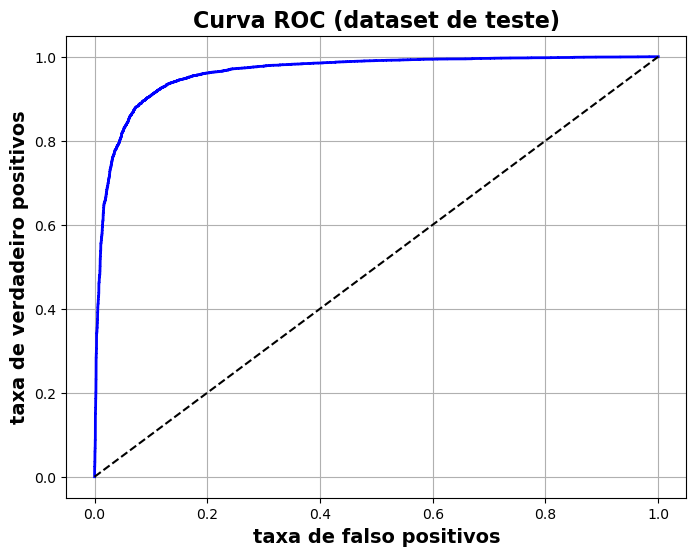

In [44]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

0.9623706291829847

In [47]:
# Como podemos ver, a curva ROC está muito boa, bem acima do classificador aleatório, chegando a atingir um score maior
# de 0.96